# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [75]:
da["DMDMARTL"].value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [76]:
da["DMDMARTL"].replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Seprated", 5:"Never married", 
                        6:"Living with parter", 77:"Refused"}, inplace=True)

In [77]:
# frequency of all
x=da["DMDMARTL"].value_counts()
all_martl=x/x.sum()
print(all_martl)

Married               0.507855
Never married         0.183412
Divorced              0.105773
Living with parter    0.096273
Widowed               0.072342
Seprated              0.033979
Refused               0.000365
Name: DMDMARTL, dtype: float64


In [78]:
# check how many missing value is exist, delete missing value in "DMDMARTL" and "RIAGENDR" columns
mis=pd.isnull(da[["DMDMARTL","RIAGENDR"]]).sum()
print(mis)
df=da[["DMDMARTL","RIAGENDR"]].dropna()
df.head()

DMDMARTL    261
RIAGENDR      0
dtype: int64


,DMDMARTL,RIAGENDR
0,Married,1
1,Divorced,1
2,Married,1
3,Living with parter,2
4,Divorced,2


In [79]:
# frequency of woman and man
df.groupby("RIAGENDR")["DMDMARTL"].value_counts()

RIAGENDR  DMDMARTL          
1         Married               1477
          Never married          484
          Living with parter     265
          Divorced               229
          Widowed                100
          Seprated                68
          Refused                  1
2         Married               1303
          Never married          520
          Divorced               350
          Widowed                296
          Living with parter     262
          Seprated               118
          Refused                  1
Name: DMDMARTL, dtype: int64

In [80]:
# select age between 30 and 40
dm=da[(da["RIDAGEYR"]>=30)&(da["RIDAGEYR"]<=40)]
dm=dm[["DMDMARTL","RIAGENDR"]]
dm.groupby("RIAGENDR")["DMDMARTL"].value_counts()

RIAGENDR  DMDMARTL          
1         Married               275
          Never married         101
          Living with parter     78
          Divorced               24
          Seprated               12
          Widowed                 3
          Refused                 1
2         Married               285
          Never married         116
          Living with parter     65
          Divorced               46
          Seprated               18
          Widowed                 2
Name: DMDMARTL, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [81]:
dw = da[da["RIAGENDR"]==1]
dw["agegroup"] = pd.cut(dw.RIDAGEYR, [18,25,35,45,55,65,75,85])
dw_p=dw.groupby("agegroup")["DMDMARTL"].value_counts()
print(dw_p)

agegroup  DMDMARTL          
(18, 25]  Never married         185
          Living with parter     34
          Married                30
          Seprated                2
          Divorced                1
(25, 35]  Married               214
          Never married         134
          Living with parter     99
          Divorced                9
          Seprated                8
          Widowed                 3
(35, 45]  Married               256
          Living with parter     56
          Never married          53
          Divorced               26
          Seprated               14
          Widowed                 2
          Refused                 1
(45, 55]  Married               299
          Divorced               49
          Never married          41
          Living with parter     31
          Seprated               11
          Widowed                 4
(55, 65]  Married               297
          Divorced               67
          Never married          49

In [82]:
dw_p=dw_p.unstack()
dw_p=dw_p.apply(lambda x: x/x.sum(), axis=1)
print(dw_p.to_string(float_format="%.3f"))

DMDMARTL  Divorced  Living with parter  Married  Never married  Refused  Seprated  Widowed
agegroup                                                                                  
(18, 25]     0.004               0.135    0.119          0.734      NaN     0.008      NaN
(25, 35]     0.019               0.212    0.458          0.287      NaN     0.017    0.006
(35, 45]     0.064               0.137    0.627          0.130    0.002     0.034    0.005
(45, 55]     0.113               0.071    0.687          0.094      NaN     0.025    0.009
(55, 65]     0.143               0.054    0.636          0.105      NaN     0.028    0.034
(65, 75]     0.140               0.047    0.656          0.047      NaN     0.047    0.064
(75, 85]     0.115               0.016    0.619          0.024      NaN     0.016    0.210


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [83]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

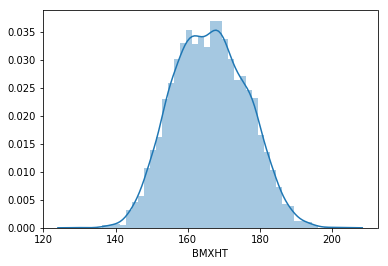

In [84]:
sns.distplot(da['BMXHT'].dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

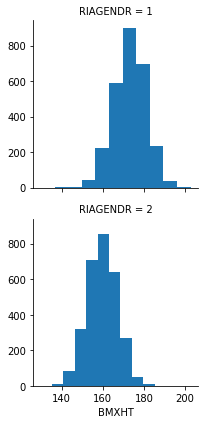

In [86]:
g = sns.FacetGrid(da, row="RIAGENDR")
g = g.map(plt.hist, "BMXHT")

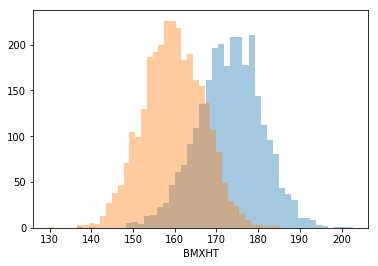

In [88]:
woman=da[da["RIAGENDR"]==1]
man=da[da["RIAGENDR"]==2]
sns.distplot(woman["BMXHT"].dropna(), kde=False)
sns.distplot(man["BMXHT"].dropna(), kde=False)

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

__Q3d.__ Make a histogram of the log-transformed heights.

In [ ]:
# insert your code here

__Q3e.__ Comment on the relationship between the ditribution of the heights and the distribution of the log-transformed heights. 

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

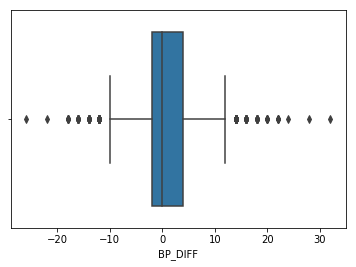

In [89]:
da["BP_DIFF"]=da["BPXSY1"]-da["BPXSY2"]
sns.boxplot(da["BP_DIFF"])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [90]:
np.mean(da["BP_DIFF"]>0)

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

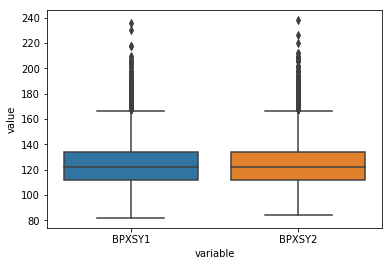

In [93]:
# boxplot different columns in one figure
a=da[["BPXSY1", "BPXSY2"]]
sns.boxplot(x="variable", y="value", data=pd.melt(a))

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [7]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [97]:
da.groupby("RIAGENDR")["BMXHT"].mean()

RIAGENDR
1    173.132050
2    159.673184
Name: BMXHT, dtype: float64

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [100]:
da.groupby("RIAGENDR")["BMXBMI"].describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,,,,,,,,
1,2718.0,28.778072,6.252568,15.1,24.4,27.9,31.975,58.8
2,2944.0,29.939946,7.753319,14.5,24.1,28.8,34.100,67.3


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.